In [3]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [29]:
def prob1():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    '''
    def ode(t,y):
        ''' define the ode system '''
        b = 5
        c = 2
        return np.array([-b*y[0]*y[1], b*y[0]*y[1] - c*y[1],c*y[1]])
    t = (0,50)
    # solve the ODE system
    sol = solve_ivp(ode,t_span = t, y0 = np.array([(44000000-1)/44000000,1/44000000,0]), t_eval=np.linspace(0,50,100))
    # get the SIR predictions
    S = sol.y[0]
    I = sol.y[1]
    R = sol.y[2]
    # find where infections were maximized
    i = I.argmax()
    # plot the SIR predictions
    plt.plot(np.linspace(0,50,100),S,label = 'Susceptible', color = 'black')
    plt.plot(np.linspace(0,50,100),I,label = 'Infected', color = 'red')
    plt.plot(np.linspace(0,50,100),R, label = 'Recovered', color = 'blue')
    plt.legend()
    plt.xlabel('T(days)')
    plt.ylabel('Proportion of Population')
    plt.show()
    # return number of people that could work when infections peaked
    # return f'Number of people that could work at peak infection: {int((S[i]+R[i])*3000000)}'


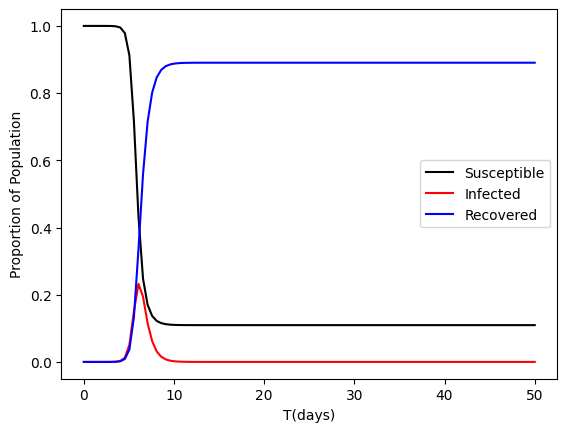

In [30]:
prob1()

In [4]:
def prob2():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    t0 = 0 
    tf = 36
    n = 44e6
    beta = 5
    gamma = 1/1.25
    birth = (8.6/1000)/12
    death = (18.5/1000)/12
    k = 33e6/n

    # define the ode system as given in the problem
    def ode(t,y):
        return np.array([-beta*y[0]*y[1]+birth*y[0]-death*y[0], beta*y[0]*y[1]-gamma*y[1],gamma*y[1]])
    
    # define the initial conditions
    y0 = np.array([(n-5)/n,5/n,0])
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    # Plot the system and label/title everything
    plt.plot(sol.t,sol.y[0],label='Ukrainian Citizens in Ukraine')
    plt.plot(sol.t,sol.y[1],label='Citizens Moving')
    plt.plot(sol.t,sol.y[2],label='Ukrainian Citizens who Emigrated')
    plt.xlabel('T (Monts)')
    plt.ylabel('Proportion of Population')
    plt.title('Ukrainian Model')
    plt.legend()
    plt.show()

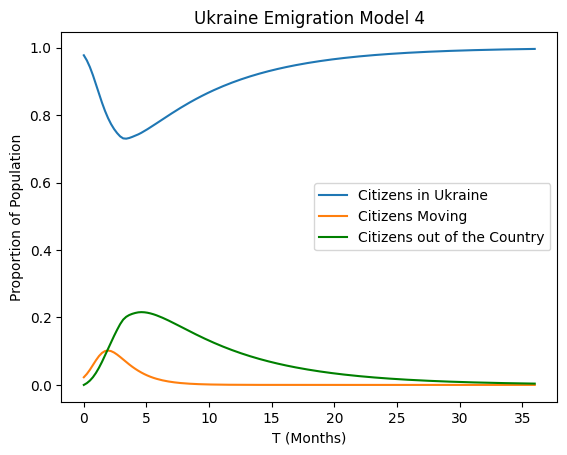

In [98]:
t0 = 0 
tf = 36
n = 44e6
beta=5
gamma=1/1.25
k = 29e6/n
c = 60e5/n
#define ode measuring the spread of disease
def ode(t,y): 
    if t <3:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
    else:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2], c * y[2]])
#initial conditions
y0 = np.array([(n-1e6)/n,1e6/n,0, 0])

#solve ivp and get solution
solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

#plots and labels
plt.plot(solution.t, solution.y[0]+solution.y[3],label="Citizens in Ukraine")
plt.plot(solution.t, solution.y[1],label="Citizens Moving")
plt.plot(solution.t, solution.y[2],'green',label="Citizens out of the Country")
# plt.plot(solution.t, solution.y[3],'purple',label="Returned to Ukraine")
plt.xlabel('T (Months)')
plt.title('Ukraine Emigration Model 4')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()